#  Shopping Behavior Analysis Project

---
### **Introduction**
This project analyzes the *Shopping Behavior* dataset to uncover customer trends, preferences, and spending habits. The analysis uses Python libraries like **Pandas**, **Matplotlib**, and **Seaborn** to explore relationships and patterns.

### **Business Questions**
- Which gender spends more on average?
- Does age influence spending behavior?
- Which categories or purchase channels are most popular?
- How does location affect shopping behavior?


### **Data Overview**
We'll load and inspect the dataset for structure, size, and missing values.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("shopping_behavior_updated.csv")

# Display basic info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### **Data Preprocessing**
We'll handle missing values, remove duplicates, and check for data consistency.

In [4]:
# Check for missing values
data.isnull().sum()

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Fill or handle missing values as needed (example)
data.fillna(method='ffill', inplace=True)

data.describe()

C:\Users\acer\AppData\Local\Temp\ipykernel_4184\1796522218.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### **Exploratory Data Analysis (EDA)**
We'll perform univariate, bivariate, and multivariate analysis with visualizations.

#### **Univariate Analysis**
Exploring individual features like gender, age, and purchase amount.

C:\Users\acer\AppData\Local\Temp\ipykernel_4184\2628596533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='Set2')


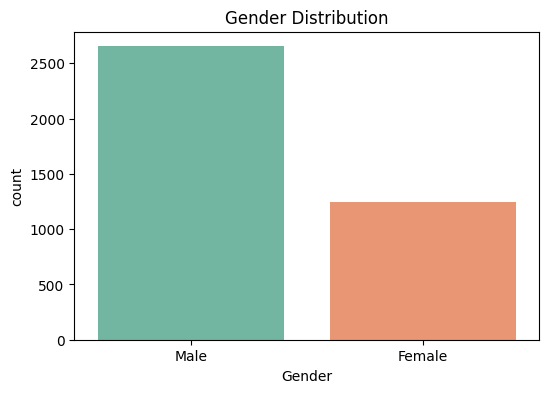

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

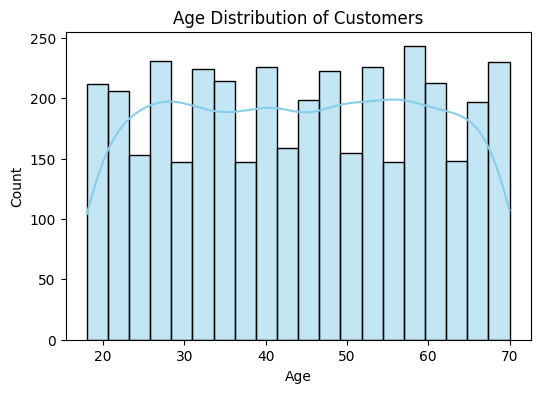

In [8]:

plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.show()

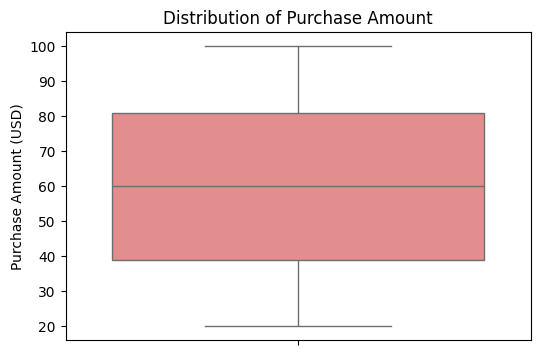

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, y='Purchase Amount (USD)', color='lightcoral')
plt.title('Distribution of Purchase Amount')
plt.show()


#### **Bivariate Analysis**
Studying relationships between two variables.

C:\Users\acer\AppData\Local\Temp\ipykernel_25856\1478661217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender', y='Purchase Amount (USD)', palette='coolwarm')


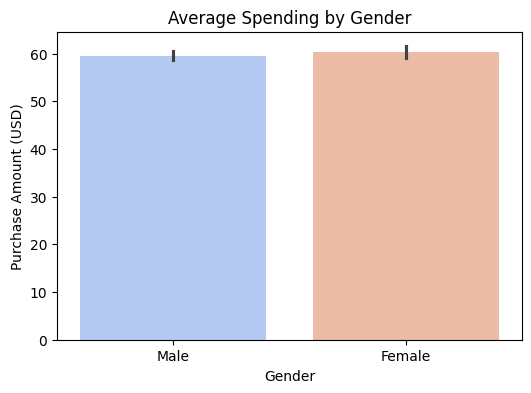

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(data=data, x='Gender', y='Purchase Amount (USD)', palette='coolwarm')
plt.title('Average Spending by Gender')
plt.show()

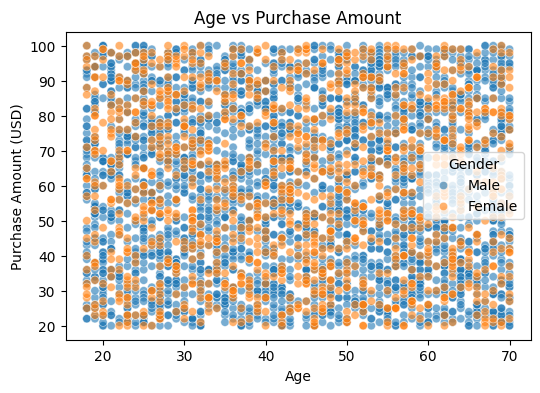

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='Age', y='Purchase Amount (USD)', hue='Gender', alpha=0.6)
plt.title('Age vs Purchase Amount')
plt.show()

#### **Multivariate Analysis**
Analyzing interactions between multiple factors.

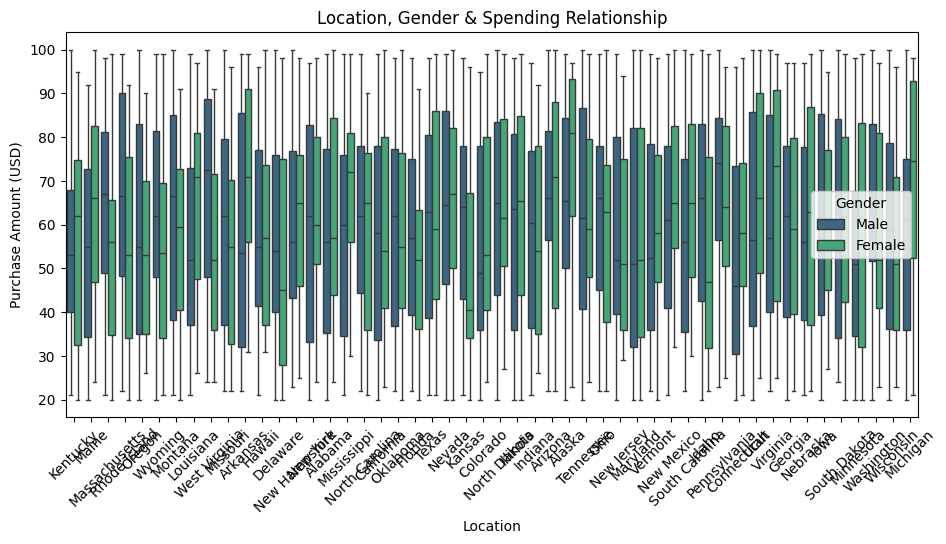

In [20]:
plt.figure(figsize=(11,5))
sns.boxplot(data=data, x='Location', y='Purchase Amount (USD)', hue='Gender', palette='viridis')
plt.title('Location, Gender & Spending Relationship')
plt.xticks(rotation=45)
plt.show()

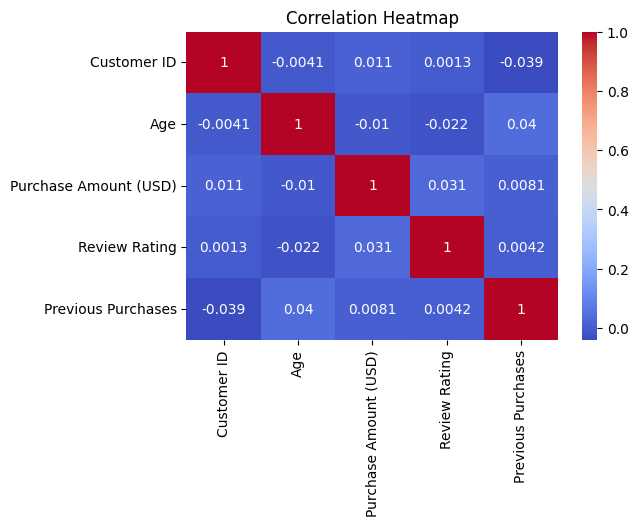

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **Conclusion**
From the analysis, we found that gender and age affect how people spend money.

People from different locations show different buying habits.

The data helps us understand what type of customers spend more and what they prefer.

These findings can help businesses plan better offers and improve sales by focusing on the right customers.



### **Recommendations**
- Focus marketing on customers who spend more.
- Give personalized offers, discounts, or suggestions based on buying habits.
- Improve sales in strong locations and find ways to grow in weaker areas.
- Keep checking customer data regularly and adjust strategies as needed.


### **References**
- Dataset: *Shopping Behavior Dataset*
- Libraries: Pandas, Matplotlib, Seaborn
- Documentation: https://pandas.pydata.org, https://seaborn.pydata.org
- CSV File from: kaggle

